# 서울시 가격안정 모범업소 상품목록
데이터 링크 : http://data.seoul.go.kr/dataList/OA-1174/S/1/datasetView.do

In [ ]:
!!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/일일 데이터 분석/

Mounted at /content/drive
/content/drive/MyDrive/일일 데이터 분석


In [2]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./서울시 가격안정 모범업소 상품목록 현황.csv',encoding='cp949')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   업소아이디        2381 non-null   int64  
 1   업소명          2381 non-null   object 
 2   분류코드         2381 non-null   int64  
 3   분류코드명        2381 non-null   object 
 4   업소 주소        2381 non-null   object 
 5   업소 전화번호      2291 non-null   object 
 6   추천수          2381 non-null   int64  
 7   상품명          2370 non-null   object 
 8   상품가격(일반)(원)  2370 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 167.5+ KB


In [5]:
df.isnull().sum()

업소아이디           0
업소명             0
분류코드            0
분류코드명           0
업소 주소           0
업소 전화번호        90
추천수             0
상품명            11
상품가격(일반)(원)    11
dtype: int64

In [6]:
df

,업소아이디,업소명,분류코드,분류코드명,업소 주소,업소 전화번호,추천수,상품명,상품가격(일반)(원)
0,9658,비니거니 치킨호프,1,한식,서울특별시 서울 양천구 중앙로46길 20-1,2690-8779,0,후라이드 치킨,11000.0
1,9658,비니거니 치킨호프,1,한식,서울특별시 서울 양천구 중앙로46길 20-1,2690-8779,0,양념치킨,13000.0
2,9657,마포갈비,1,한식,서울특별시 강남구 남부순환로361길 6 1층,02-3462-9955,0,된장찌개,6000.0
3,9657,마포갈비,1,한식,서울특별시 강남구 남부순환로361길 6 1층,02-3462-9955,0,생삼겹살(200g),14000.0
4,9657,마포갈비,1,한식,서울특별시 강남구 남부순환로361길 6 1층,02-3462-9955,0,돼지갈비(250g),14000.0
...,...,...,...,...,...,...,...,...,...
2376,272,홍노래방,13,기타서비스업종,서울특별시 마포구 홍익로 1 (서교동),3142-1551,7,노래방이용료(3인),15000.0
2377,272,홍노래방,13,기타서비스업종,서울특별시 마포구 홍익로 1 (서교동),3142-1551,7,노래방이용료(2인),15000.0
2378,272,홍노래방,13,기타서비스업종,서울특별시 마포구 홍익로 1 (서교동),3142-1551,7,노래방이용료,15000.0
2379,263,장미미용실,5,이 미용업,서울특별시 서울 중랑구 용마산로129길 61-4,NaN,137,미용료(파마),20000.0


In [7]:
# 구 생성
gu = []
split_address = df['업소 주소'].map(lambda x : re.split(' ',x))

for i in range(len(split_address)):
  for word in split_address[i]:
    if ('구' in word) & ('구로동' not in word) & ('구의' not in word):
      gu.append(word)

In [8]:
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')
df['위경도 주소'] = df['업소 주소'][:20].map(lambda x: x if re.split(' ', x)[-1][-1].isdigit() else ' '.join(re.split(' ', x)[:-1]))

# 주소기반 위도, 경도 반환
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

latitude = []
longitude =[]

for i in df['위경도 주소']:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

df['경도'] = longitude
df['위도'] = latitude

In [9]:
df.head()

,업소아이디,업소명,분류코드,분류코드명,업소 주소,업소 전화번호,추천수,상품명,상품가격(일반)(원),위경도 주소,경도,위도
0,9658,비니거니 치킨호프,1,한식,서울특별시 서울 양천구 중앙로46길 20-1,2690-8779,0,후라이드 치킨,11000.0,서울특별시 서울 양천구 중앙로46길 20-1,126.855450,37.522419
1,9658,비니거니 치킨호프,1,한식,서울특별시 서울 양천구 중앙로46길 20-1,2690-8779,0,양념치킨,13000.0,서울특별시 서울 양천구 중앙로46길 20-1,126.855450,37.522419
2,9657,마포갈비,1,한식,서울특별시 강남구 남부순환로361길 6 1층,02-3462-9955,0,된장찌개,6000.0,서울특별시 강남구 남부순환로361길 6,127.036881,37.485876
3,9657,마포갈비,1,한식,서울특별시 강남구 남부순환로361길 6 1층,02-3462-9955,0,생삼겹살(200g),14000.0,서울특별시 강남구 남부순환로361길 6,127.036881,37.485876
4,9657,마포갈비,1,한식,서울특별시 강남구 남부순환로361길 6 1층,02-3462-9955,0,돼지갈비(250g),14000.0,서울특별시 강남구 남부순환로361길 6,127.036881,37.485876


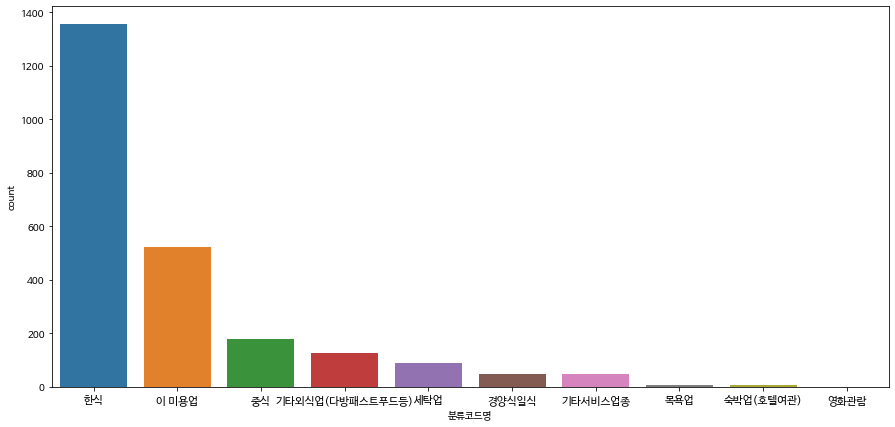

In [10]:
# 분류코드별 착한가격업소
plt.figure(figsize=(15,7))
sns.countplot(df['분류코드명'],order = df['분류코드명'].value_counts().index)
plt.xticks(size=11)
plt.show()

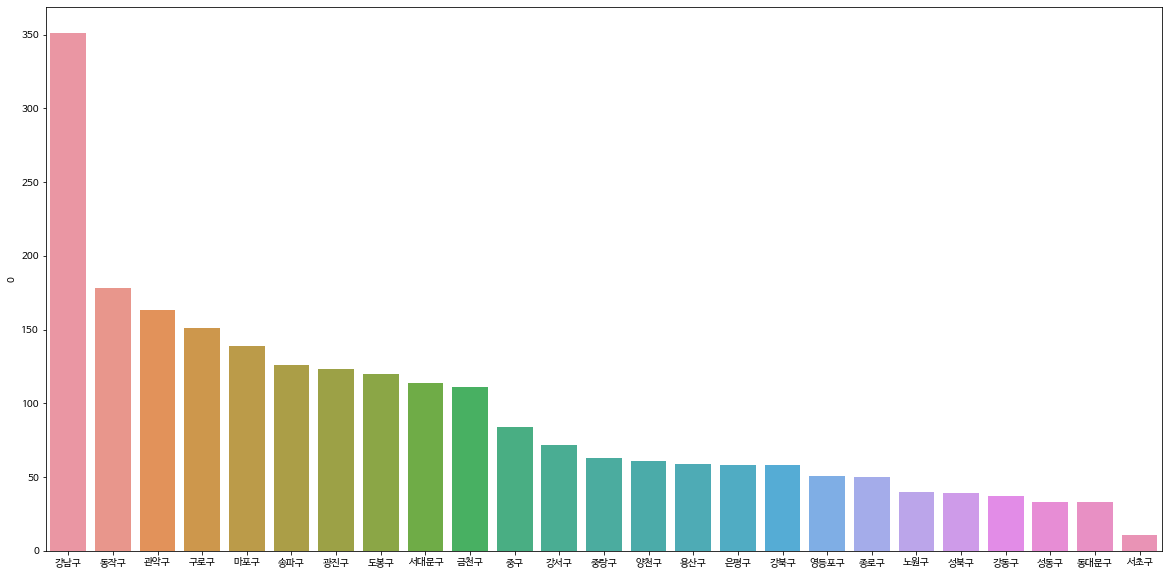

In [11]:
# 구별 분포
plt.figure(figsize=(20,10))
sns.barplot(x = pd.DataFrame(gu).reset_index()[0].value_counts().index[:-11] , y = pd.DataFrame(gu).reset_index()[0].value_counts()[:-11])
plt.show()

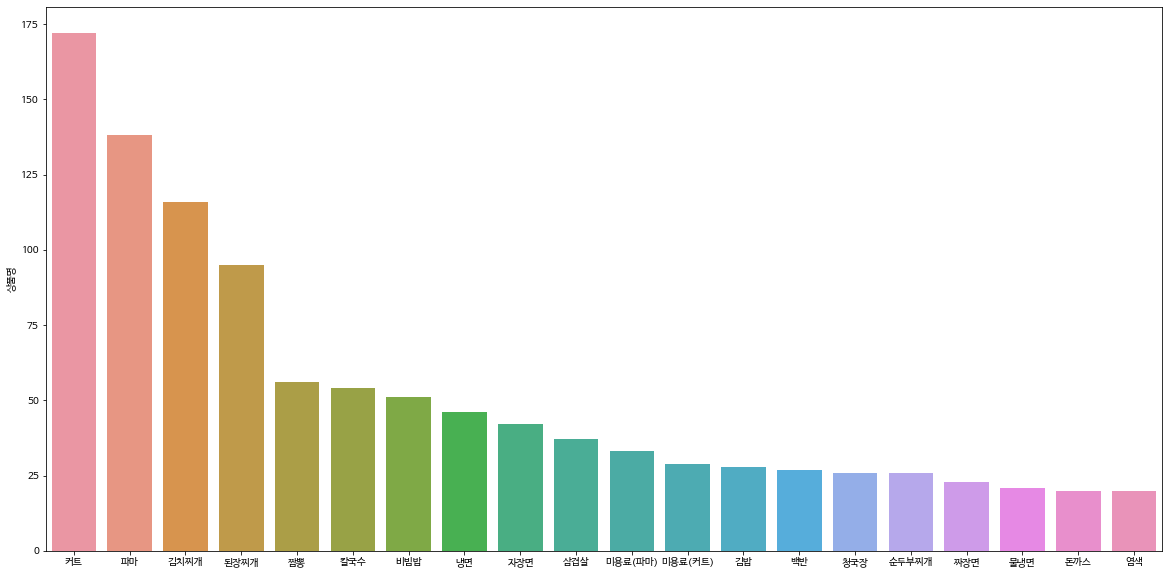

In [12]:
# 상품명 분포
plt.figure(figsize=(20,10))
sns.barplot(x= df['상품명'].value_counts()[:20].index, y= df['상품명'].value_counts()[:20])
plt.show()

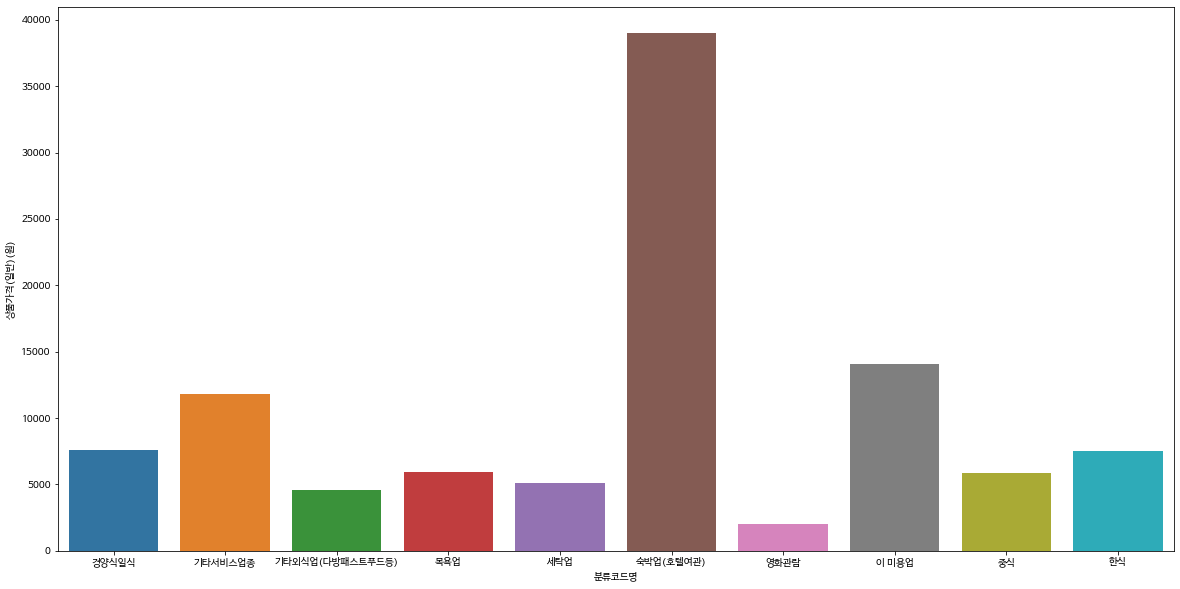

In [ ]:
# 분류코드별 가격
cost_df = df.groupby('분류코드명').mean()

plt.figure(figsize=(20,10))
sns.barplot(x=cost_df.index,y=cost_df['상품가격(일반)(원)'])
plt.show()

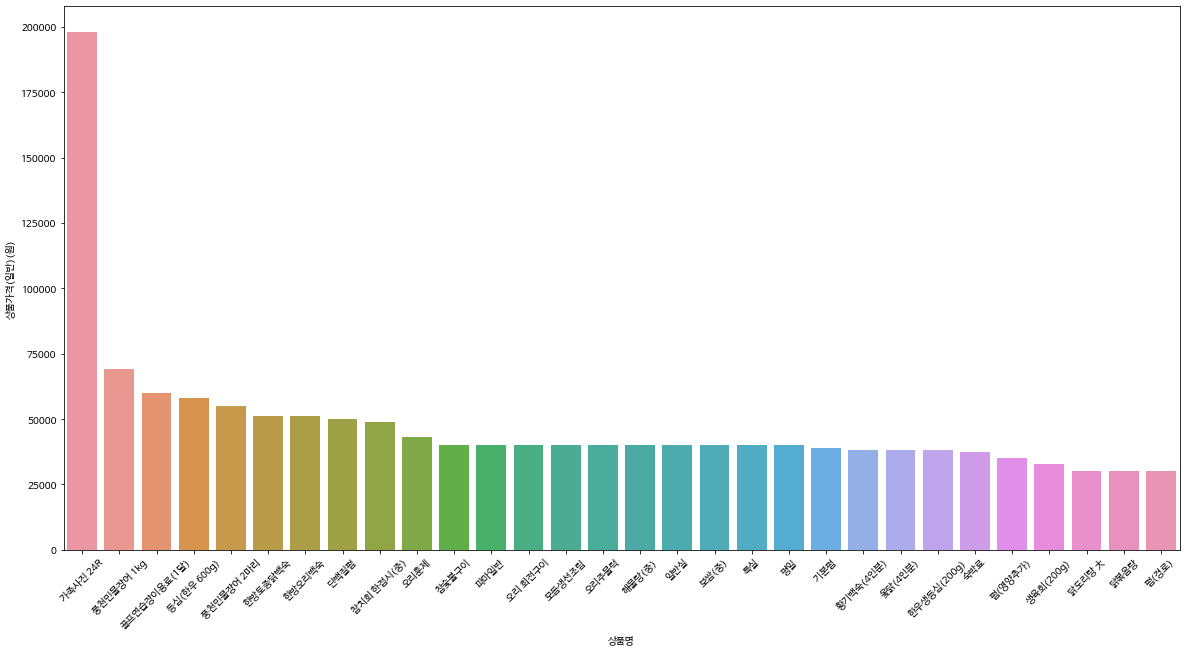

In [ ]:
# 상품별 평균 가격 top30
cost_df = df.groupby('상품명').mean().sort_values('상품가격(일반)(원)',ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x=cost_df[:30].index,y=cost_df['상품가격(일반)(원)'][:30])
plt.xticks(rotation=45)
plt.show()

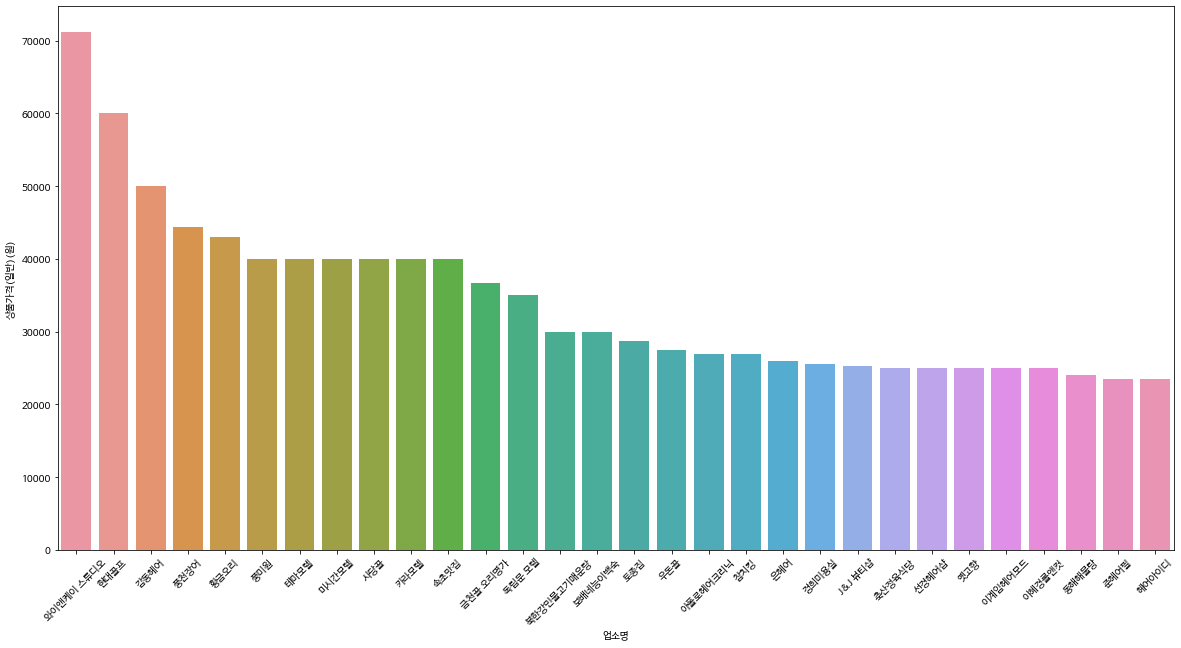

In [28]:
# 업소별 평균 가격 top 30
cost_df = df.groupby('업소명').mean().sort_values('상품가격(일반)(원)',ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x=cost_df[:30].index,y=cost_df['상품가격(일반)(원)'][:30])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 판매하는 메뉴 개수가 가장 많은 모범업소
for name in df['업소명'].value_counts().index[:10]:
  name_df = df[df['업소명'] == name]
  print(name , ':' , list(name_df['상품명'].unique()))

만미정 식당 : ['김치찌개', '동태찌개', '청국장', '조기백반', '제육덮밥', '육개장', '순두부찌개', '소내장탕', '설렁탕', '부대찌개', '된장찌개']
홍두깨손칼국수 : ['칼국수', '소고기콩나물밥', '손수제비', '옛날손칼국수', '수제비', '잔치국수']
훼밀리김밥 : ['비빔밥', '칼국수', '조리라면', '물냉면', '된장찌개백반', '돈가스', '김치찌개백반', '김밥']
헤어아이디 : ['파마', '커트']
다정이모네 : ['비빔밥', '제육볶음', '청국장', '순대국(국산)', '된장찌개', '동태탕', '제육볶음(국산)']
김밥천국 : ['김치찌개', '냉면', '된장찌개', '돈가스', '김밥']
대풍참숯갈비 : ['삼결살(200g)', '와규갈비살(150g)', '돼지왕갈비(250g)', '삼겹살(200g)']
전주집 : ['청국장', '국산콩비지', '비빔밥', '김치찌개', '오징어덮밥', '돌솥비빔밥']
알리파스타 : ['알리오올리오', '클래식', '통새우볶음밥', '알리오올리오 ']
영미용실 : ['파마', '커트']
